<a href="https://colab.research.google.com/github/GriselMP/PLN_violence/blob/main/VAW_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, Adam
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation

In [ ]:
#Data and clas import
data_train = "/content/drive/MyDrive/probar/violence/train.txt"
clas_train = "/content/drive/MyDrive/probar/violence/clasesTRAIN.txt"

data_test = "/content/drive/MyDrive/probar/violence/test.txt"
clas_test = "/content/drive/MyDrive/probar/violence/clasesTST.txt"

#training and test

x_train = pd.read_csv(data_train, header=None)
y_train = pd.read_csv(clas_train, header=None)

x_test = pd.read_csv(data_test, header=None)
y_test = pd.read_csv(clas_test, header=None)

#---------------------------------------------------------------------------
#print(x_train,y_train)
print(x_train.shape)
print(x _test.shape)

print("Muestras entrenamiento")
print(len(x_train))
print(Counter(y_train[0][:]))
print("Muestras test")
print(len(x_test))
print(Counter(y_test[0][:]))

(26470, 1)
(9240, 1)
Muestras entrenamiento
26470
Counter({0: 23936, 1: 2534})
Muestras test
9240
Counter({0: 8331, 1: 909})


12814
Epoch 1/50
320/320 [==============================] - 6s 15ms/step - loss: 0.6945 - accuracy: 0.5010 - val_loss: 0.6911 - val_accuracy: 0.9016
Epoch 2/50
320/320 [==============================] - 4s 14ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6884 - val_accuracy: 0.9016
Epoch 3/50
320/320 [==============================] - 4s 13ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6869 - val_accuracy: 0.9016
Epoch 4/50
320/320 [==============================] - 4s 13ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6941 - val_accuracy: 0.0984
Epoch 5/50
320/320 [==============================] - 5s 16ms/step - loss: 0.6933 - accuracy: 0.4992 - val_loss: 0.7003 - val_accuracy: 0.0984
Epoch 6/50
320/320 [==============================] - 4s 13ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.7016 - val_accuracy: 0.0984
Epoch 7/50
320/320 [==============================] - 4s 13ms/step - loss: 0.5570 - accuracy: 0.8182 - val_loss: 0.2957 - val_accuracy: 

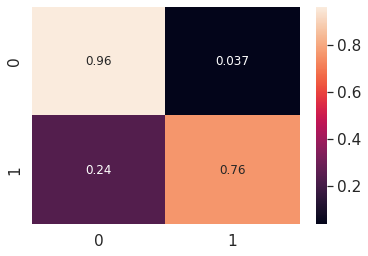

12814
              precision    recall  f1-score   support

           0     0.9737    0.9630    0.9683      8331
           1     0.6920    0.7613    0.7250       909

    accuracy                         0.9432      9240
   macro avg     0.8328    0.8622    0.8467      9240
weighted avg     0.9460    0.9432    0.9444      9240



In [ ]:
#---------------------------------------------------------------------------
#Matrix converted
min_df=2

vectorizer = TfidfVectorizer(analyzer='word',min_df=min_df)

X_train = vectorizer.fit_transform(x_train[0][:]) #aprende el vocabulario
#print(X_train)
X_train=X_train.toarray() #transforma el texto a numeros
#print(X_train)
#print(X_train.shape)
min_max_scaler = preprocessing.MinMaxScaler()
x1 = min_max_scaler.fit_transform(X_train) #transforma los datos en un rango de 0 y 1
#y1= np.array(y_train[0][:])

#Sampling Metod
#--------------------------------------------------------------------------
metodoTraining = SMOTE(n_jobs=7)

x1, y1 = metodoTraining.fit_resample(x1, y_train[0][:])
X_test=vectorizer.transform(x_test[0][:]) #para el conjunto de test
X_test=X_test.toarray()
x2 = min_max_scaler.transform(X_test) #convierte los datos a un rango de 0 y 1
y2 = np.array(y_test[0][:])

print(x1.shape[1])
#NeuralNetwork
epochs=30
batch_size=150 #tamaño del lote de muestras a ingresar
tf.keras.backend.clear_session() #limpia la ejecución o entorno de sesión
#-----------------------------------------------------------------------------------------------
#Model generation
model = Sequential()
model.add(Dense(8,input_shape=(x1.shape[1],),activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(2,activation='softmax'))
#model= load_model('/content/drive/My Drive/newTrain/modelo.h5')
adam=keras.optimizers.Adam(learning_rate=0.0006)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
snn=model.fit(x1,y1,validation_data=(x2,y2),batch_size=batch_size,epochs=epochs,shuffle=True) #realiza el entrenamiento

plt.plot(snn.history['loss'],label='loss',marker="x", markersize="5", markeredgewidth="2")
plt.plot(snn.history['val_loss'],label='val_loss',marker="x", markersize="5", markeredgewidth="2")
sn.set(font_scale=.8)
plt.title("Loss")
plt.legend(loc='center right',fontsize='10')
plt.show()

plt.plot(snn.history['accuracy'],label='accuracy',marker="x", markersize="5", markeredgewidth="2")
plt.plot(snn.history['val_accuracy'],label='val_accuracy',marker="x", markersize="5", markeredgewidth="2")
sn.set(font_scale=.8)
plt.title("Accuracy")
plt.legend(loc='center right',fontsize='10')
plt.show()

#model.summary()

#Evaluation Test
evaluation = model.evaluate(x2,y2,batch_size=batch_size,verbose=1)
snn_pred = model.predict(x2, batch_size=batch_size)
snn_predicted = np.argmax(snn_pred, axis=1)
snn_cm = confusion_matrix(y2, snn_predicted)
snn_cmN= np.zeros((len(snn_cm),len(snn_cm)))
for i in range(len(snn_cm)):
    total=0
    for k in range(len(snn_cm)):
        total=total+snn_cm[i][k]
        total=total.astype(float)
    for j in range(len(snn_cm)):
        snn_cmN[i][j]=(snn_cm[i][j]/total)

snn_df_cm = pd.DataFrame(snn_cmN, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(snn_df_cm, annot=True,annot_kws={"size": 12})
plt.show()

print(x1.shape[1])
snn_report1 = classification_report(y2, snn_predicted,digits=4)
print(snn_report1)

In [ ]:
frase=['']

frase1=vectorizer.transform(frase).toarray()
dato=min_max_scaler.transform(frase1)
pred = model.predict(dato)
predicted = np.argmax(pred, axis=1)
  #cadena=str(frase)

print(predicted)

import tweepy
import json
import os

class TweesListerner(tweepy.StreamListener):
  def on_connect(self):
    print("Estoy conectado")

  def on_status(self,status):
    if status._json["place"] != None:
      #evaluar
      text=status._json["text"]
      frase=[str(text)]
      place= status._json["place"]['full_name']
      place1= [str(place)]
      frase1=vectorizer.transform(frase).toarray()
      if np.mean(frase1)!=0:
        dato=min_max_scaler.transform(frase1)
        pred = model.predict(dato)
        probabilidad_A=pred[0][0]
        probabilidad_B=pred[0][1]
        result=probabilidad_A-probabilidad_B
        result_positivo=result**2
        if result_positivo<=0.1:
          file = open('/content/drive/MyDrive/newTrain/ambiguos.txt','a')
          cadena= '%s\n' % (frase)
          file.write(cadena)
          file.close
        else:
          predicted = np.argmax(pred, axis=1)
      else:
        pred=[0]
        predicted = [0]
        print(predicted,np.round(np.mean(frase1),4),pred,place1,frase)
        #print(predicted[0],place1[0],frase)

  def on_error (self, status_code):
    print("Error", status_code)

#Validation KEY of twitter
consumer_key = "XXXXXXXXXXXXXXXXXX" #Counsumer Key
consumer_secret = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX" #Consumer Key Secret
access_token ="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX" #Access Token
access_token_secret= "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX" #Access Token Secret

auth = tweepy.OAuthHandler (consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

stream= TweesListerner()
streamingApi = tweepy.Stream(auth=api.auth, listener=stream)
streamingApi.filter(
	#track=["fea", "gorda", "puta","naca","zorra","mujer"], #lista de palabras clave
	locations=[-118.59919006,14.38862422,-86.49327807,32.71865523], #lista de localizaciones
	languages=["es"],
)

[0]
Estoy conectado
[0] 0.0 [0] ['Nicaragua'] ['@Zucaritasguy Ajá JAJAJA']
[0] 0.0 [0] ['Guadalajara, Jalisco'] ['@LaMendietta14 @PonchoGutz Jajaja']
[0] 0.0 [0] ['Florida, USA'] ['@CoromotoMyriam Amén 🙏']
[0] 0.0 [0] ['Valle de Bravo, México'] ['@Fernand94601484 Buenísimo diría yo 😋']
[0] 0.0 [0] ['General Escobedo, Nuevo León'] ['@ilsignoresith Ésas son']
[0] 0.0 [0] ['Cuauhtémoc, Distrito Federal'] ['@chispaDeath Tiene sellado su pasaporte??']
[0] 0.0 [0] ['Nicaragua'] ['Y así fue!']
[0] 0.0 [0] ['Coatzacoalcos, Veracruz de Ignacio de la Llave'] ['@karoagueros Y yo con las fragancias ajajjaja']
[0] 0.0 [0] ['Miguel Hidalgo, Distrito Federal'] ['@chayito09 Eso es un apapacho']
[0] 0.0 [0] ['Zapopan, Jalisco'] ['@RicardoBSalinas Bendiceme tío Richard😜']
[0] 0.0 [0] ['León, Guanajuato'] ['@grlrem @aixagarciaaaa sisoy']
[0] 0.0 [0] ['Veracruz, Veracruz de Ignacio de la Llave'] ['Jajajajajaja si soy']
[0] 0.0 [0] ['Naucalpan de Juárez, México'] ['@Paupau_HB Jajajaja']
[0] 0.0 [0] ['Pachu

KeyboardInterrupt: ignored